In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


#Dataaugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Earlystopping
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#Scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
x_test.shape[0]

10000

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
#Data aug. 
datagen = ImageDataGenerator(rotation_range=45)
datagen.fit(x_train)

In [10]:
model = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [12]:
#EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [15]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=20, 
                    validation_data=(x_test, y_test),callbacks=[early_stop] )

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3849 - accuracy: 0.8848 - val_loss: 0.1387 - val_accuracy: 0.9573
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3825 - accuracy: 0.8871 - val_loss: 0.1319 - val_accuracy: 0.9586
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3682 - accuracy: 0.8897 - val_loss: 0.1312 - val_accuracy: 0.9592
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3720 - accuracy: 0.8896 - val_loss: 0.1323 - val_accuracy: 0.9594
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3666 - accuracy: 0.8908 - val_loss: 0.1336 - val_accuracy: 0.9594
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3567 - accuracy: 0.8968 - val_loss: 0.1286 - val_accuracy: 0.9594
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3539 - accuracy: 0.8951 - val_loss: 0.1290 -

In [16]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
hist.history['loss']

[0.3848807215690613,
 0.3825393617153168,
 0.3682107627391815,
 0.37197431921958923,
 0.3665711283683777,
 0.356749564409256,
 0.35386693477630615,
 0.3523523509502411,
 0.3507007956504822,
 0.34879037737846375,
 0.34421226382255554,
 0.34566640853881836,
 0.3430193364620209,
 0.3394933342933655,
 0.33551156520843506,
 0.3314746618270874,
 0.3319817781448364,
 0.3280237913131714]

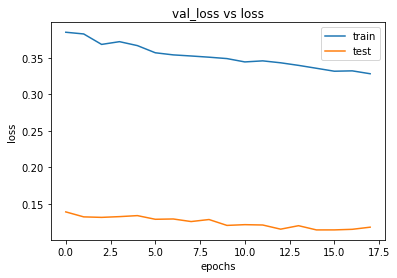

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('val_loss vs loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9662
test_loss:  0.11404424160718918
test_acc:  0.9661999940872192


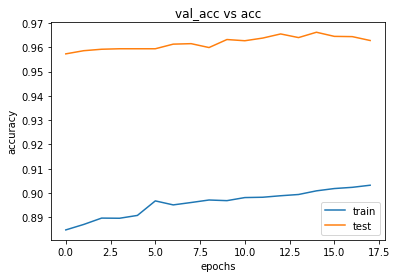

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('val_acc vs acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()